*Problem Statement:*


    

In this notebook I used fashion mnist dataset for classification of multiclass. Here I used ANN architecture for the classification of images of fashion items with different styles.

For the more information about the dataset you can refer this: https://www.kaggle.com/zalando-research/fashionmnist

In [1]:
#Load required libraries
import tensorflow as tf
import numpy as np

In [2]:
#load fashion mnist dataset from the tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

In [3]:
#print shapes
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (60000, 28, 28)
ytrain shape: (60000,)
xtest shape: (10000, 28, 28)
ytest shape: (10000,)


In [4]:
#here 60000 is samples,28*28 is shape of the each image

In [5]:
#print shape of first image 
print(xtrain[0].shape)

(28, 28)


In [8]:
#print first five ytrain values
print(ytrain[:5]) 

[9 0 0 3 0]


In [9]:
#We can see here that name of images are decoded as numbers. So, from the above mentioned link we can get corresponding names for classes.

In [12]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Class of this image is: Ankle boot


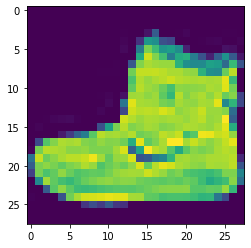

In [13]:
#print any one image with the class number
from matplotlib import pyplot as plt
plt.imshow(xtrain[0,:,:])  #0: first sample
print('Class of this image is:',class_names[ytrain[0]])

In [14]:
#reshape xtrain,xtest as row vector
x_train=xtrain.reshape(60000,28*28)
x_test=xtest.reshape(10000,28*28)

In [15]:
#Scaling
x_train=x_train/255
x_test=x_test/255

In [16]:
#Encode the ytrain,ytest 
y_train=tf.keras.utils.to_categorical(ytrain,num_classes=10)
y_test=tf.keras.utils.to_categorical(ytest,num_classes=10)

In [17]:
#print y_train for checking the ytrain as encoded or not
print(y_train)  #yes encoded

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Build a model

In [30]:
#import required libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers,optimizers

In [19]:
#training

In [57]:
def train_and_test_model(iterations,lr,lamda):
    
    #Define parameters
    iterations=iterations
    learning_rate=lr
    hidden_nodes=512
    output_nodes=10
    
    #Build model
    model=Sequential()
    #input_shape=28*28,units=number of hidden neurons required in first hidden layers
    model.add(Dense(units=hidden_nodes,activation='relu',input_shape=(784,)))
    #Define second hidden layers,here input_shape is not required becoz layer is sequential so it will remember last layers output nodes.
    #those output nodes are becomes input_shape for the next layer
    model.add(Dense(units=hidden_nodes,activation='relu'))
    #Define third hidden layers
    model.add(Dense(units=hidden_nodes,activation='relu'))
    #Defne fourth hidden layer
    model.add(Dense(units=hidden_nodes,activation='relu'))
    #Define output layer,here activation function is softmax bcoz we have 10 classes in classification
    #and introduce l2 regularization
    model.add(Dense(units=output_nodes,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    
    #Define optimizer
    #first define sgd 
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
    
    #fit model
    #I dont want to print the report at each batch(use verbose=0)  # want to see verbose=1
    model.fit(x_train,y_train,epochs=iterations,batch_size=1000,verbose=0)
    #print the report after running all epochs
    [loss,train_score]=model.evaluate(x_train,y_train)
    [loss,test_score]=model.evaluate(x_test,y_test)
    return train_score,test_score
    

In [58]:
#lets give parameters and check 
lr=0.001
lamda=0  # no regularization
train_and_test_model(10,lr,lamda)

313/313 [==============================] - 1s 2ms/step - loss: 1.7214 - accuracy: 0.6274


(0.6365833282470703, 0.6273999810218811)

In [59]:
#now change the lr value to 0.01
lr=0.01
lamda=0  # no regularization
train_and_test_model(10,lr,lamda)

313/313 [==============================] - 1s 2ms/step - loss: 0.6196 - accuracy: 0.7871


(0.800083339214325, 0.7871000170707703)

In [60]:
#now change the lr value to 0.1
lr=0.1
lamda=0  # no regularization
train_and_test_model(50,lr,lamda)

313/313 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8800


(0.9178333282470703, 0.8799999952316284)

There is a some over fitting issue in the model,Because model is performance is good during train with an accuracy of 91.78%,But during testing 88% accuracy is achieved.

In [62]:
 #now give the lambda value
lr=0.1
lamda=0.01  #  regularization
train_and_test_model(50,lr,lamda)

313/313 [==============================] - 1s 2ms/step - loss: 0.4459 - accuracy: 0.8531


(0.8723833560943604, 0.8531000018119812)

For the lambda value of .01 model is still facing overfitting problem and model with learning rate of 0.1 and lambda of 0.0 is giving the best result.So consider that model for future prediction.

                                              ----Thank you----

In [ ]:
#Extra work 

In [56]:
#lamda=0.1:accuracy is 92.6%
#lamda=0.01:accuracy is 96.66%
#lamda=0.001:accuracy is 96.35%
#lamda=0.0001:accuracy is 94.445%
#increasing or decreasing of lambda value to greater extends,accuracy will get reduce so be caution with lambda value

In [29]:
#testing

In [30]:
def train_and_test_model(iterations,lr,lamda):
    
    #Define parameters
    iterations=iterations
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    
    #Build model
    model=Sequential()
    #input_shape=28*28,units=number of hidden neurons required in first hidden layers
    model.add(Dense(units=hidden_nodes,activation='relu',input_shape=(784,)))
    #Define second hidden layers,here input_shape is not required becoz layer is sequential so it will remember last layers output nodes.
    #those output nodes are becomes input_shape for the next layer
    model.add(Dense(units=hidden_nodes,activation='relu'))
    #Define output layer,here activation function is softmax bcoz we have 10 classes in classification
    #and introduce l2 regularization
    model.add(Dense(units=output_nodes,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    
    #Define optimizer
    #first define sgd 
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
    
    #fit model
    #I dont want to print the report at each batch(use verbose=0)  # want to see verbose=1
    model.fit(x_train,y_train,epochs=iterations,batch_size=1000,verbose=0)
    #print the report after running all epochs
    [loss,train_score]=model.evaluate(x_train,y_train)
    [loss,test_score]=model.evaluate(x_test,y_test)
    
    return train_score,test_score

In [31]:
lr=1
lamda=0.01  #  regularization
train_and_test_model(10,lr,lamda) #less overfitting

313/313 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000


(0.10000000149011612, 0.10000000149011612)

*Interpretation:*
    
   This model is free of overfitting issue because both train and test accuracy are same.

In [32]:
lr=1
lamda=10   #  regularization
train_and_test_model(10,lr,lamda) # underfitting 

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000


(0.10000000149011612, 0.10000000149011612)

In [33]:
#This model is underfitting

In [34]:
#Coarse tuning
import math 
for k in range(1,10):
    lr=math.pow(10,np.random.uniform(-7.0,3.0))
    lamda=math.pow(10,np.random.uniform(-7,-2))

    best_acc=train_and_test_model(10,lr,lamda)
    
    print('k:',k,'epocs:',100,'accuracy:',best_acc,'alpha:',lr,'Regularization:',lamda)

313/313 [==============================] - 0s 1ms/step - loss: 2.2402 - accuracy: 0.1595
k: 1 epocs: 100 accuracy: (0.16054999828338623, 0.15950000286102295) alpha: 6.672576300767695e-05 Regularization: 2.667307323397617e-05
313/313 [==============================] - 0s 1ms/step - loss: 2.3418 - accuracy: 0.1292
k: 2 epocs: 100 accuracy: (0.1287333369255066, 0.12919999659061432) alpha: 4.417517861072489e-07 Regularization: 3.368778329873847e-07
313/313 [==============================] - 0s 1ms/step - loss: 2.3416 - accuracy: 0.1051
k: 3 epocs: 100 accuracy: (0.10490000247955322, 0.10509999841451645) alpha: 7.406044395134339e-06 Regularization: 4.1443042424509384e-05
313/313 [==============================] - 0s 1ms/step - loss: 2.3130 - accuracy: 0.1255
k: 4 epocs: 100 accuracy: (0.1256166696548462, 0.12549999356269836) alpha: 3.025791648631914e-07 Regularization: 1.2096563723344393e-07
313/313 [==============================] - 0s 1ms/step - loss: 2.4305 - accuracy: 0.1024
k: 5 epocs:

*Interpretation:*
    
   alpha=0.54,regularization=0.0001 for these values my model is giving the best result.
    
   

Some weights initializers are
1. GLOROT Uniform  (keras uses this weight initializer)

weigth_intializer=np.sqrt(3/(fan_avg))

fan_avg=(fav_in+fan_out)/2

2. He-normal

In [35]:
from tensorflow.keras.layers import Dropout

def tune_model(learning_rate,activation,dropout_rate,initializer,num_unit):

    
    model=Sequential()
    model.add(Dense(units=num_unit,activation=activation,kernel_initializer=initializer,input_shape=(784,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=num_unit,activation=activation,kernel_initializer=initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=10,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
    
    return model
    

In [36]:
batch_size=[20,50,100][:1]
epochs=[1,20,50][:1]
initializer=['lecun_uniform','normal','he_normal','he_uniform'][:1]
learning_rate=[0.1,0.001,0.02][:1]
dropout_rate=[0.3,0.2,0.8][:1]
num_unit=[10,5][:1]
activation=['relu','tanh','sigmoid','hard_sigmoid','linear'][:1]

In [37]:
parameters=dict(batch_size=batch_size,
               epochs=epochs,
               learning_rate=learning_rate,
               dropout_rate=dropout_rate,
               num_unit=num_unit,
               initializer=initializer,
               activation=activation)

In [38]:
#This package converts to model into scikit learn form
model=tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=tune_model,verbose=0)

In [39]:
#Now model is converted to scikit learn form, so now we can apply grid search cv on it.

from sklearn.model_selection import GridSearchCV
models=GridSearchCV(estimator=model,param_grid=parameters,n_jobs=1)

In [40]:
best_model=models.fit(x_train,y_train)
print('Best model:',best_model.best_params_)

Best model: {'activation': 'relu', 'batch_size': 20, 'dropout_rate': 0.3, 'epochs': 1, 'initializer': 'lecun_uniform', 'learning_rate': 0.1, 'num_unit': 10}
